## Gesture Recognition with Synthetic Data

### Description 
We are building a machine learning model to recognize hand gestures from sensor data. The
dataset is synthetic, simulating realistic sensor readings for gestures like swipe_left,
swipe_right, palm_stop, thumbs_up, and peace_sign. Each sample contains hand position,
velocity, acceleration, finger count, hand angle, and the gesture label. The goal is to train a
Decision Tree classifier, evaluate its performance, and understand how features influence
predictions.

#### Data Generation
• Generate synthetic samples for each gesture. • Features include: o hand_pos_x, hand_pos_y,
hand_pos_z o velocity_x, velocity_y, velocity_z o acceleration_x, acceleration_y, acceleration_z
o finger_count, hand_angle • Label: gesture • Store all samples in a Pandas DataFrame

In [2]:
# NumPy is used for numerical operations and random number generation
import numpy as np
# Pandas is used for handling tabular data (DataFrames)
import pandas as pd

In [3]:
# List of gesture labels (these are our target classes)
gestures = [
'swipe_left',
'swipe_right',
'palm_stop',
'thumbs_up',
'peace_sign'
]
# Number of samples (rows) we want for each gesture
num_samples_per_gesture = 1000

In [4]:
# This list will store every generated data sample
# Each sample will later become one row in the DataFrame
all_samples = []

In [6]:
# Loop through each gesture type 
for gesture in gestures:
# Generate multiple samples for the current gesture
    for _ in range(num_samples_per_gesture):
# Create one synthetic data sample
        sample = {
                    # Hand position in 3D space (meters, simulated)
                    'hand_pos_x': np.random.uniform(-0.5, 0.5),
                    'hand_pos_y': np.random.uniform(0.1, 1.0),
                    'hand_pos_z': np.random.uniform(-0.3, 0.3),
                    # Hand velocity along each axis (meters/second)
                    'velocity_x': np.random.uniform(-0.1, 0.1),
                    'velocity_y': np.random.uniform(-0.1, 0.1),
                    'velocity_z': np.random.uniform(-0.1, 0.1),
                    # Hand acceleration (meters/second²)
                    'acceleration_x': np.random.uniform(-0.05, 0.05),
                    'acceleration_y': np.random.uniform(-0.05, 0.05),
                    'acceleration_z': np.random.uniform(-0.05, 0.05),
                    # Number of visible fingers (1 to 5)
                    'finger_count': np.random.randint(1, 6),
                    # Orientation of the hand in degrees
                    'hand_angle': np.random.uniform(0, 360),
                    # Gesture label (target variable)
                    'gesture': gesture
        }
# Add the sample to our dataset
all_samples.append(sample)

In [7]:
# Convert the list of dictionaries into a Pandas DataFrame
df_synthetic = pd.DataFrame(all_samples)

In [8]:
df_synthetic

,hand_pos_x,hand_pos_y,hand_pos_z,velocity_x,velocity_y,velocity_z,acceleration_x,acceleration_y,acceleration_z,finger_count,hand_angle,gesture
0,-0.062280,0.348336,-0.275814,0.032760,0.089861,0.091454,-0.049683,0.028093,-0.020729,1,121.136729,peace_sign
1,-0.280631,0.675356,-0.102726,-0.028304,-0.090546,-0.060539,-0.007447,-0.045847,-0.020810,1,318.090161,peace_sign


In [9]:
df_synthetic.head()

,hand_pos_x,hand_pos_y,hand_pos_z,velocity_x,velocity_y,velocity_z,acceleration_x,acceleration_y,acceleration_z,finger_count,hand_angle,gesture
0,-0.062280,0.348336,-0.275814,0.032760,0.089861,0.091454,-0.049683,0.028093,-0.020729,1,121.136729,peace_sign
1,-0.280631,0.675356,-0.102726,-0.028304,-0.090546,-0.060539,-0.007447,-0.045847,-0.020810,1,318.090161,peace_sign


In [24]:
df_synthetic.tail(10)

,hand_pos_x,hand_pos_y,hand_pos_z,velocity_x,velocity_y,velocity_z,acceleration_x,acceleration_y,acceleration_z,finger_count,hand_angle,gesture
0,-0.062280,0.348336,-0.275814,0.032760,0.089861,0.091454,-0.049683,0.028093,-0.020729,1,121.136729,peace_sign
1,-0.280631,0.675356,-0.102726,-0.028304,-0.090546,-0.060539,-0.007447,-0.045847,-0.020810,1,318.090161,peace_sign


#### Exploratory Data Analysis (EDA)
• Inspect dataset structure (.head(), .shape, .info()). • Check for missing values. • Compute
descriptive statistics (.describe()). • Check class balance (value_counts()). • Analyze feature
relationships (correlation, scatter plots)

In [14]:
# display (rows, columns)
df_synthetic.shape

(2, 12)

In [15]:
# Display Feature names
df_synthetic.columns

Index(['hand_pos_x', 'hand_pos_y', 'hand_pos_z', 'velocity_x', 'velocity_y',
       'velocity_z', 'acceleration_x', 'acceleration_y', 'acceleration_z',
       'finger_count', 'hand_angle', 'gesture'],
      dtype='object')

In [16]:
#data frame genernar information
df_synthetic.info

<bound method DataFrame.info of    hand_pos_x  hand_pos_y  hand_pos_z  velocity_x  velocity_y  velocity_z  \
0   -0.062280    0.348336   -0.275814    0.032760    0.089861    0.091454   
1   -0.280631    0.675356   -0.102726   -0.028304   -0.090546   -0.060539   

   acceleration_x  acceleration_y  acceleration_z  finger_count  hand_angle  \
0       -0.049683        0.028093       -0.020729             1  121.136729   
1       -0.007447       -0.045847       -0.020810             1  318.090161   

      gesture  
0  peace_sign  
1  peace_sign  >

In [17]:
#Check data types
df_synthetic.dtypes

hand_pos_x        float64
hand_pos_y        float64
hand_pos_z        float64
velocity_x        float64
velocity_y        float64
velocity_z        float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
finger_count        int64
hand_angle        float64
gesture            object
dtype: object

In [18]:
# Check for missing values
df_synthetic.isnull().sum()

hand_pos_x        0
hand_pos_y        0
hand_pos_z        0
velocity_x        0
velocity_y        0
velocity_z        0
acceleration_x    0
acceleration_y    0
acceleration_z    0
finger_count      0
hand_angle        0
gesture           0
dtype: int64

In [19]:
# Understand basic statistics of dataset
df_synthetic.describe()

,hand_pos_x,hand_pos_y,hand_pos_z,velocity_x,velocity_y,velocity_z,acceleration_x,acceleration_y,acceleration_z,finger_count,hand_angle
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000
mean,-0.171456,0.511846,-0.189270,0.002228,-0.000342,0.015458,-0.028565,-0.008877,-0.020769,1.0,219.613445
std,0.154397,0.231238,0.122392,0.043179,0.127567,0.107475,0.029866,0.052284,0.000057,0.0,139.267108
min,-0.280631,0.348336,-0.275814,-0.028304,-0.090546,-0.060539,-0.049683,-0.045847,-0.020810,1.0,121.136729
25%,-0.226043,0.430091,-0.232542,-0.013038,-0.045444,-0.022540,-0.039124,-0.027362,-0.020789,1.0,170.375087
50%,-0.171456,0.511846,-0.189270,0.002228,-0.000342,0.015458,-0.028565,-0.008877,-0.020769,1.0,219.613445
75%,-0.116868,0.593601,-0.145998,0.017494,0.044760,0.053456,-0.018006,0.009608,-0.020749,1.0,268.851803
max,-0.062280,0.675356,-0.102726,0.032760,0.089861,0.091454,-0.007447,0.028093,-0.020729,1.0,318.090161


In [20]:
# Check class distribution (for classification)
df_synthetic['gesture'].value_counts()

gesture
peace_sign    2
Name: count, dtype: int64

In [21]:
#Check relationships between features
df_synthetic.select_dtypes(include='number').corr()

,hand_pos_x,hand_pos_y,hand_pos_z,velocity_x,velocity_y,velocity_z,acceleration_x,acceleration_y,acceleration_z,finger_count,hand_angle
hand_pos_x,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,NaN,-1.0
hand_pos_y,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,1.0
hand_pos_z,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,1.0
velocity_x,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,NaN,-1.0
velocity_y,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,NaN,-1.0
velocity_z,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,NaN,-1.0
acceleration_x,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,1.0
acceleration_y,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,NaN,-1.0
acceleration_z,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,NaN,-1.0
finger_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Preparation
• Separate features (X) and label (y). • Split data into training (80%) and testing (20%) sets
using train_test_split. • Optionally, stratify by gesture to maintain balanced classes

In [25]:
# train_test_split is a utility function from scikit-learn
# It helps us split data into training and testing sets
from sklearn.model_selection import train_test_split

In [28]:
# X contains all input features (everything except the label)
X = df_synthetic.drop('gesture', axis=1)
# y contains the target labels (what we want the model to predict)
y = df_synthetic['gesture']

In [29]:
# Split the dataset into training and testing sets
# test_size=0.2 means 20% of the data is used for testing
# random_state ensures reproducibility (same split every time)
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
test_size=0.2,
random_state=42
)

In [30]:
# Print the number of samples in each set
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("\nTraining label set shape:", y_train.shape)
print("Testing label set shape:", y_test.shape)

Training feature set shape: (1, 11)
Testing feature set shape: (1, 11)

Training label set shape: (1,)
Testing label set shape: (1,)


In [32]:
#stratify=y keeps gesture classes balanced
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
test_size=0.2,
random_state=42,
stratify=y
)

#### Model Training
• Choose Decision Tree classifier (DecisionTreeClassifier from sklearn). • Fit the model on the
training set (.fit(X_train, y_train)).

In [34]:
# Import DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [35]:
# Create a Decision Tree classifier
# random_state ensures reproducibility
dt_model = DecisionTreeClassifier(random_state=42)

In [36]:
# Train (fit) the model using the training data
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
# Predict gesture labels for the test set
y_pred = dt_model.predict(X_test)

In [38]:
#y_pred

#### Model Evaluation
• Predict on test data (.predict(X_test)). • Compute accuracy (accuracy_score) and detailed
metrics (classification_report). • Generate confusion matrix to visualize misclassifications. •
Analyze which gestures are confused and why.

In [39]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 1.0


In [41]:
# Show detailed performance for each gesture
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

  peace_sign       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [42]:
# Import confusion matrix and visualization tools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [43]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the raw confusion matrix
print("Confusion Matrix:\n")
print(cm)

Confusion Matrix:

[[1]]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


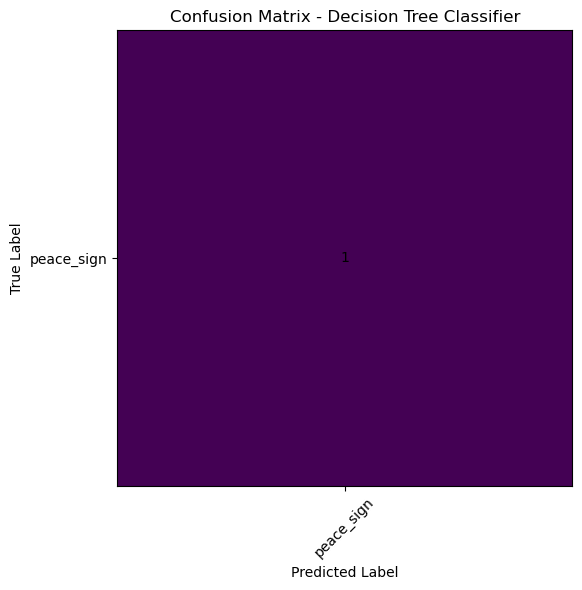

In [44]:
# Get the list of gesture labels
gesture_labels = dt_model.classes_
# Create a figure
plt.figure(figsize=(8, 6))
# Display the confusion matrix as an image
plt.imshow(cm)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# Add tick marks and labels
plt.xticks(range(len(gesture_labels)), gesture_labels, rotation=45)
plt.yticks(range(len(gesture_labels)), gesture_labels)
# Add numbers inside each cell
for i in range(len(gesture_labels)):
    for j in range(len(gesture_labels)):
        plt.text(j, i, cm[i, j], ha="center", va="center")
# Show the plot
plt.tight_layout()
plt.show()  

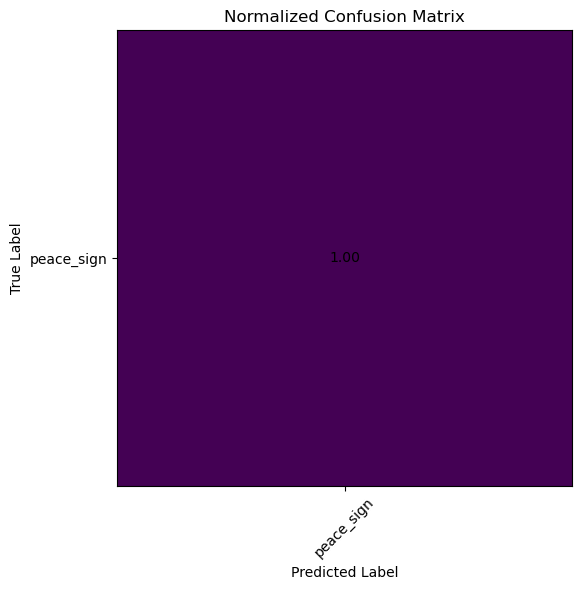

In [45]:
# Normalize the confusion matrix
#This shows percentages instead of raw counts, which is often easier to interpret.
cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(8, 6))
plt.imshow(cm_normalized)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(range(len(gesture_labels)), gesture_labels, rotation=45)
plt.yticks(range(len(gesture_labels)), gesture_labels)
# Display percentages
for i in range(len(gesture_labels)):
    for j in range(len(gesture_labels)):
        plt.text(j, i, f"{cm_normalized[i, j]:.2f}",
ha="center", va="center")
plt.tight_layout()
plt.show()

#### Model Interpretation
• Visualize the decision tree (plot_tree) to see feature splits. • Check feature importance to
understand which features contribute most to predictions. • Optionally, retrain with limited
depth to avoid overfitting.

#### Feature Importance
Use the trained Decision Tree to see which input features matter most for predicting gestures.

**Task 1: Analyze feature importance**

**Goal:** Understand which features the Decision Tree thinks are most important for predicting gestures.

**What to do:**
- Use the trained `dt_model` to get feature importances.
- Visualize them in a bar chart.
- Identify the top 3 features that contribute most to predictions.

**Hints:**
- Use `dt_model.feature_importances_` to get importance scores.
- `pandas.Series` + `.sort_values(ascending=False)` makes it easy to sort.
- Use `matplotlib.pyplot.bar` for a simple visualization.
- Ask: “Does the model rely more on hand position, velocity, or finger count?”

**Learning outcome:** Students learn how ML models weigh different inputs and why understanding feature importance matters.

Top 3 features:
hand_pos_x    0.0
hand_pos_y    0.0
hand_pos_z    0.0
dtype: float64


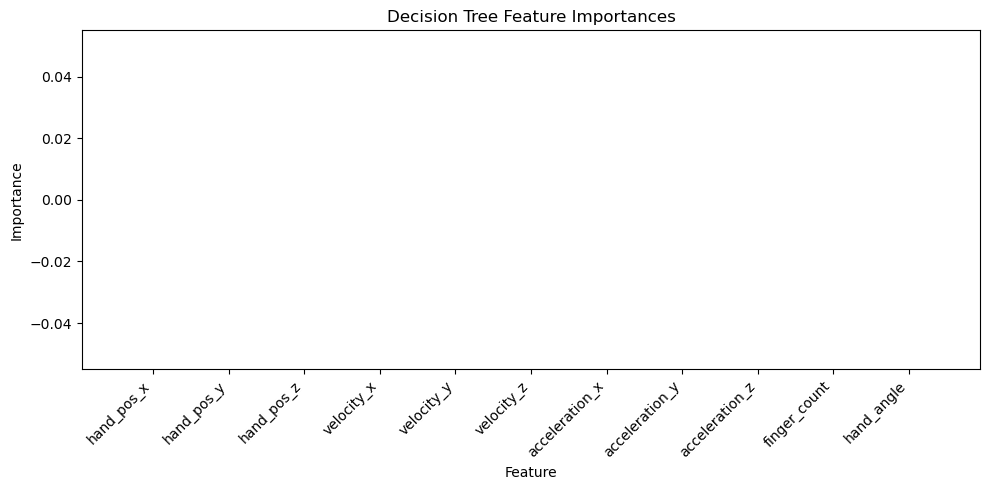

In [49]:
# Compute feature importances
importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=False)

# Display top 3 features
top_3 = importances_sorted.head(3)
print("Top 3 features:")
print(top_3)

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.bar(importances_sorted.index, importances_sorted.values)
plt.title("Decision Tree Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Task 2: Improve model generalization**

**Goal:** Prevent overfitting by limiting tree complexity or adjusting parameters.

**What to do:**
- Train a new Decision Tree with `max_depth=5` or `min_samples_leaf=10`.
- Compare its accuracy on training vs test data.
- Visualize the tree and discuss trade-offs.

**Hints:**
- Overfitting = training accuracy very high, test accuracy low.
- Try combinations: `max_depth`, `min_samples_split`, `min_samples_leaf`.
- Use `accuracy_score` from `sklearn.metrics` to compare.
- Observe the tree plot: shallower trees are easier to interpret.

**Learning outcome:** Students learn about overfitting, underfitting, and model tuning.

**Task 3: Identify gesture confusions**

**Goal:** Analyze the confusion matrix to find which gestures are hardest for the model to distinguish.

**What to do:**
- Generate a confusion matrix using `y_test` and `y_pred`.
- Visualize it (raw counts or normalized percentages).
- Identify gestures that are most often misclassified.
- Suggest reasons why certain gestures are confused and possible ways to fix it.

**Hints:**
- Look for large off-diagonal values.
- Consider features like `finger_count` and `hand_angle`—maybe some gestures have overlapping values.
- Normalizing the matrix makes percentages easier to interpret.

**Learning outcome:** Students learn how to interpret model errors and think critically about data quality, features, and model limitations.

Confusion Matrix (raw counts):
[[1]]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


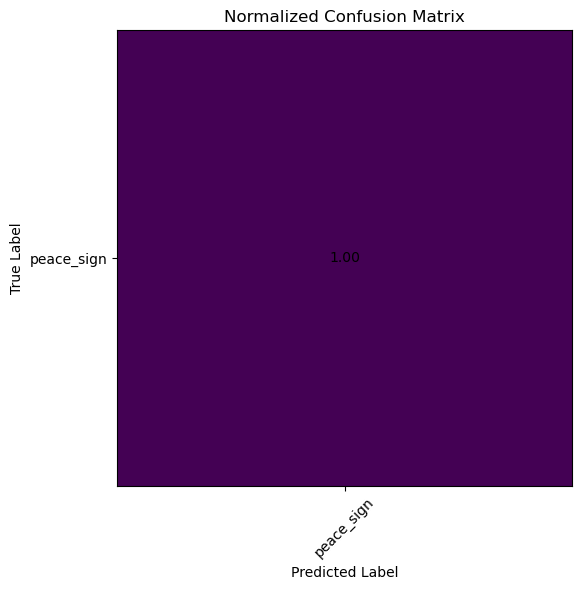


Top gesture confusions (true → predicted):

Possible reasons & fixes:
- Similar hand positions/angles between gestures can cause overlap.
- Finger counts may be identical for some gestures; add richer features.
- Consider more training data or a different model (e.g., Random Forest).


In [53]:
# Confusion matrix (raw counts)
cm_task3 = confusion_matrix(y_test, y_pred, labels=dt_model.classes_)
labels_task3 = dt_model.classes_

print("Confusion Matrix (raw counts):")
print(cm_task3)

# Normalized confusion matrix (percentages)
cm_task3_norm = cm_task3.astype(float) / cm_task3.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 6))
plt.imshow(cm_task3_norm)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(range(len(labels_task3)), labels_task3, rotation=45)
plt.yticks(range(len(labels_task3)), labels_task3)
for i in range(len(labels_task3)):
    for j in range(len(labels_task3)):
        plt.text(j, i, f"{cm_task3_norm[i, j]:.2f}", ha="center", va="center")
plt.tight_layout()
plt.show()

# Identify most confused gesture pairs (largest off-diagonal values)
cm_off = cm_task3.copy()
np.fill_diagonal(cm_off, 0)
flat_indices = np.dstack(np.unravel_index(np.argsort(cm_off.ravel())[::-1], cm_off.shape))[0]
top_pairs = []
for i, j in flat_indices:
    if cm_off[i, j] == 0:
        break
    true_label = labels_task3[i]
    pred_label = labels_task3[j]
    count = cm_off[i, j]
    pct = cm_task3_norm[i, j]
    top_pairs.append((true_label, pred_label, count, pct))
    if len(top_pairs) == 3:
        break

print("\nTop gesture confusions (true → predicted):")
for true_label, pred_label, count, pct in top_pairs:
    print(f"{true_label} → {pred_label}: {count} ({pct:.2%})")

print("\nPossible reasons & fixes:")
print("- Similar hand positions/angles between gestures can cause overlap.")
print("- Finger counts may be identical for some gestures; add richer features.")
print("- Consider more training data or a different model (e.g., Random Forest).")

Generalized Tree - Training Accuracy: 1.0
Generalized Tree - Test Accuracy: 1.0


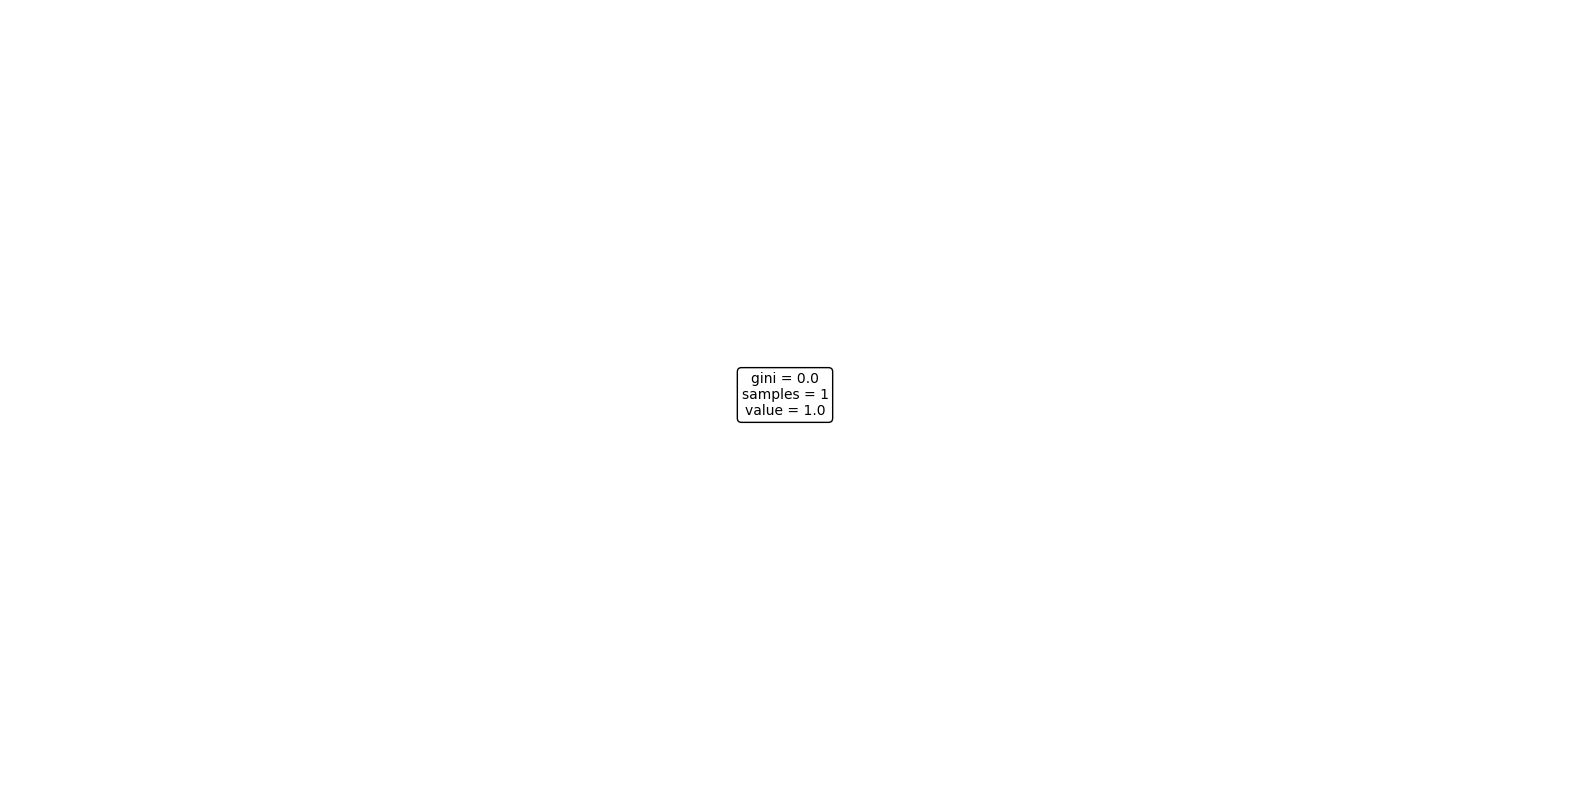

In [50]:
# Train a more generalizable Decision Tree
dt_model_general = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)
dt_model_general.fit(X_train, y_train)

# Compare training vs test accuracy
train_pred = dt_model_general.predict(X_train)
test_pred = dt_model_general.predict(X_test)
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Generalized Tree - Training Accuracy:", train_acc)
print("Generalized Tree - Test Accuracy:", test_acc)

# Visualize the smaller tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model_general,
    feature_names=X_train.columns,
    class_names=dt_model_general.classes_,
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.show()

In [46]:
# Import the tree visualization function
from sklearn.tree import plot_tree
# Import matplotlib for plotting
import matplotlib.pyplot as plt

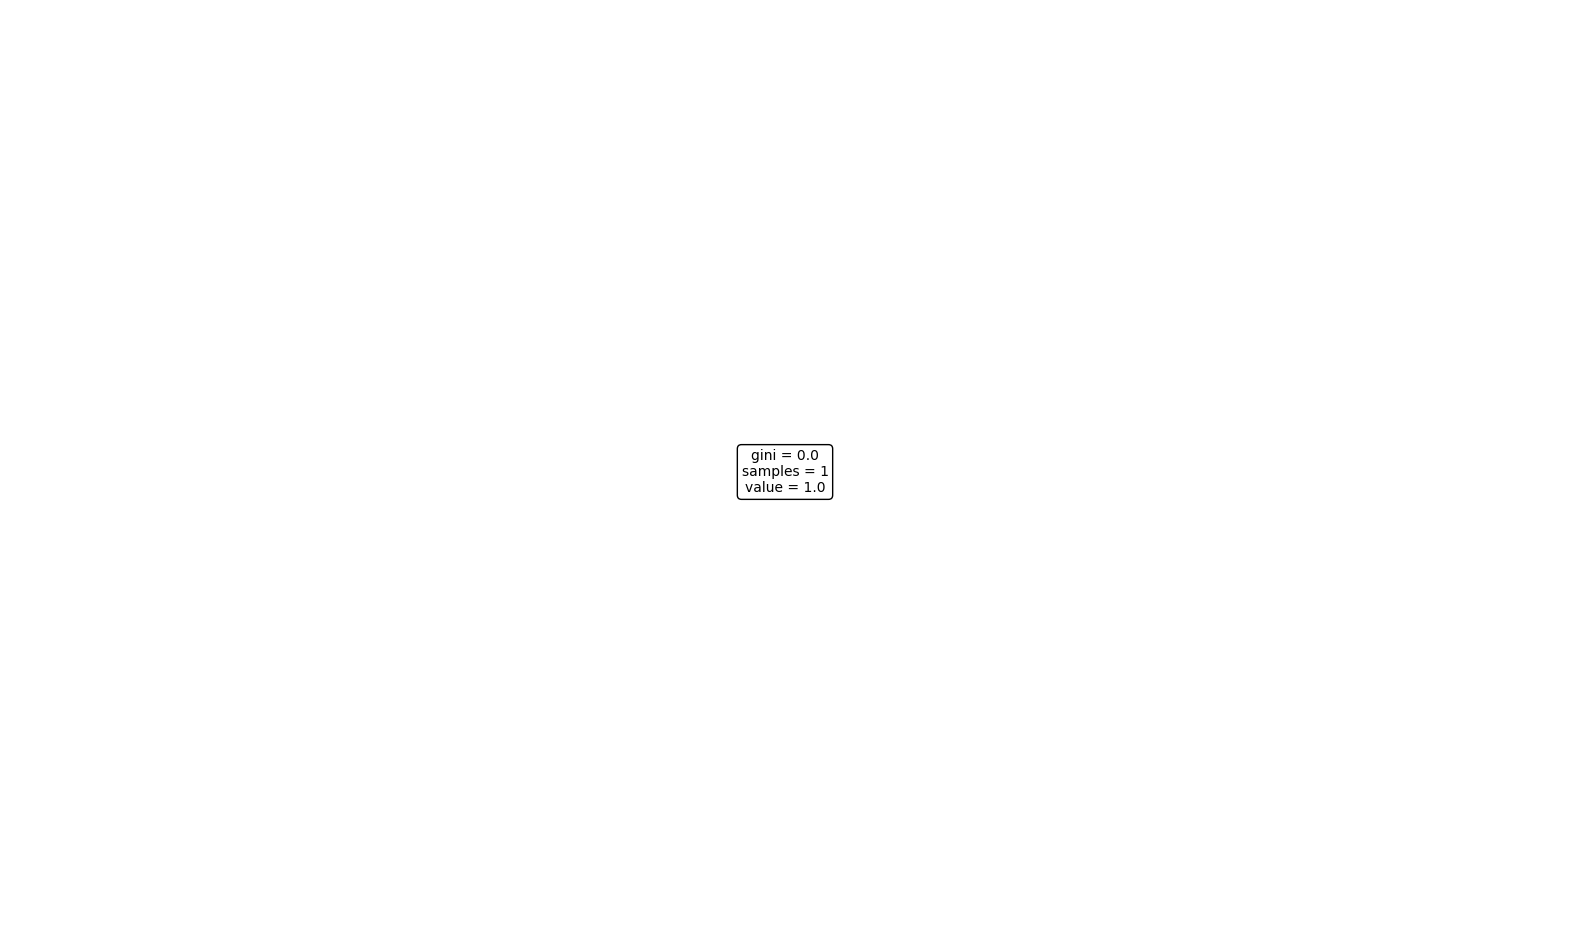

In [47]:
# Create a large figure so the tree is readable
plt.figure(figsize=(20, 12))
# Plot the decision tree
plot_tree(
dt_model, # trained Decision Tree model
feature_names=X_train.columns, # feature names
class_names=dt_model.classes_, # class (gesture) labels
filled=True, # color nodes by class
rounded=True, # rounded corners for readability
fontsize=10
)
# Show the plot
plt.show()

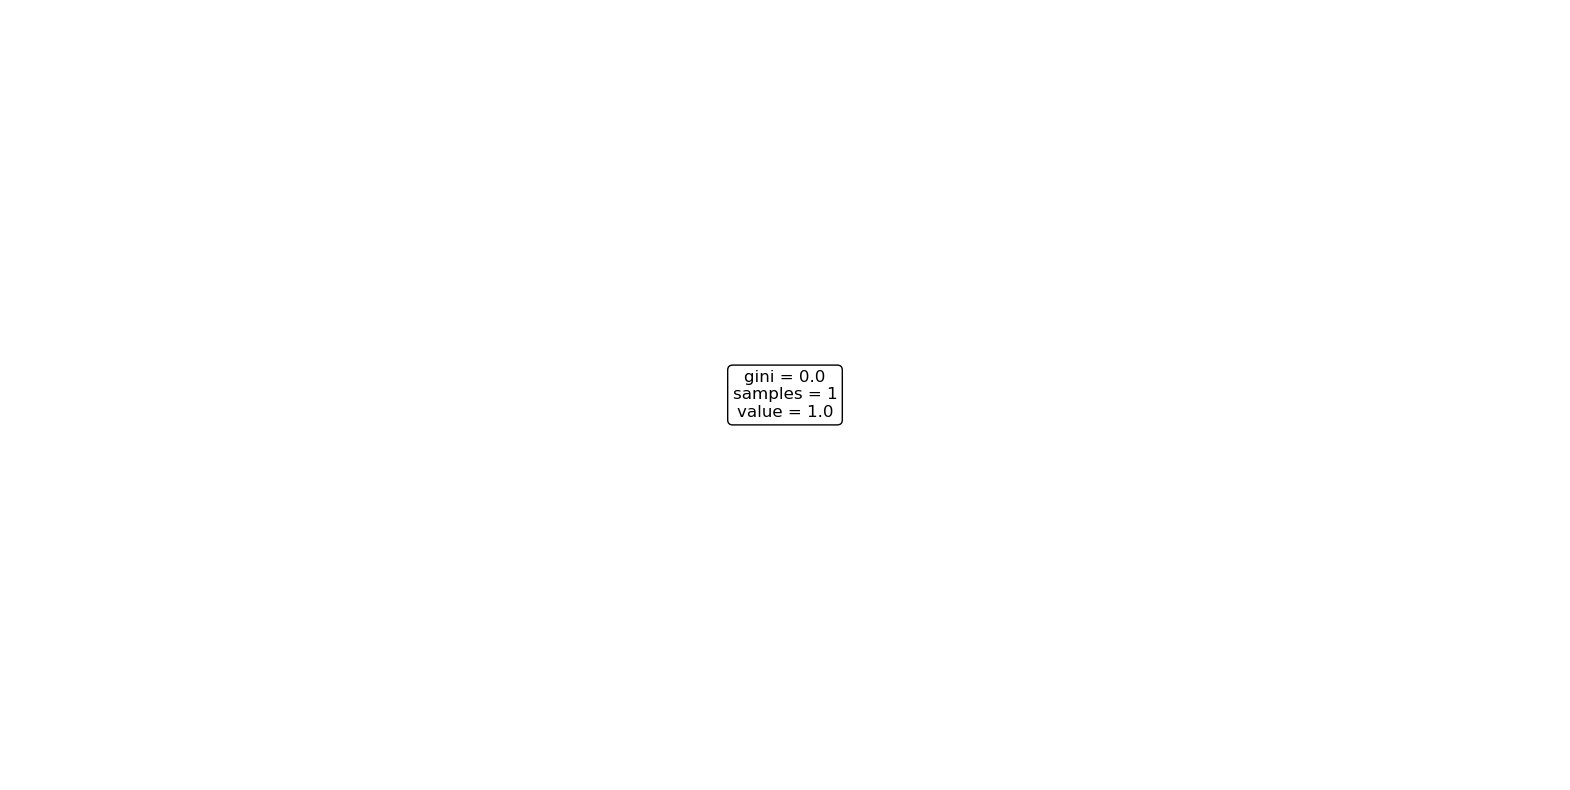

In [48]:
# Train a smaller tree for visualization
dt_model_small = DecisionTreeClassifier(
max_depth=3,
random_state=42
)
dt_model_small.fit(X_train, y_train)
# Plot the smaller tree
plt.figure(figsize=(20, 10))
plot_tree(
dt_model_small,
feature_names=X_train.columns,
class_names=dt_model_small.classes_,
filled=True,
rounded=True,
fontsize=12
)
plt.show()